# Pytorch Quickstart

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## Input Sample

In [1]:
import pandas as pd
import torch

data = {
    'feature1': [1.0, 2.0, 3.0, 4.0],
    'feature2': [5.0, 6.0, 7.0, 8.0],
    'feature3': [9.0, 10.0, 11.0, 12.0]
}

df = pd.DataFrame(data)
print("DataFrame:\n", df)

numpy_array = df.values
print("NumPy Array:\n", numpy_array)

tensor = torch.tensor(numpy_array, dtype=torch.float32)
print("PyTorch Tensor:\n", tensor)


DataFrame:
    feature1  feature2  feature3
0       1.0       5.0       9.0
1       2.0       6.0      10.0
2       3.0       7.0      11.0
3       4.0       8.0      12.0
NumPy Array:
 [[ 1.  5.  9.]
 [ 2.  6. 10.]
 [ 3.  7. 11.]
 [ 4.  8. 12.]]
PyTorch Tensor:
 tensor([[ 1.,  5.,  9.],
        [ 2.,  6., 10.],
        [ 3.,  7., 11.],
        [ 4.,  8., 12.]])


In [2]:
import torch

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8727, 0.8265, 0.8132],
        [0.3759, 0.8040, 0.3011],
        [0.0656, 0.1284, 0.7082],
        [0.8890, 0.4792, 0.7416],
        [0.2410, 0.6412, 0.0165]])


In [4]:
torch.cuda.is_available()

False

In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [6]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="../../data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="../../data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [7]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [9]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Create a sample DataFrame
train_data = pd.DataFrame({
    'feature1': [0., 1., 1., 1., 0., 1., 0., 1.],
    'feature2': [0., 1., 0., 1., 1., 1., 0., 1.],
    'feature3': [0., 1., 0., 1., 0., 1., 1., 1.],
    'feature4': [1., 1., 0., 1., 0., 1., 0., 1.],
    'label': [0., 1., 0., 1., 0., 1., 0., 1.]
})

test_data =pd.DataFrame({
    'feature1': [0., 1., 0., 1., 0., 1., 0., 1.],
    'feature2': [0., 1., 0., 1., 0., 1., 0., 1.],
    'feature3': [0., 1., 0., 1., 0., 1., 0., 1.],
    'feature4': [0., 1., 0., 1., 0., 1., 0., 1.],
    'label': [0., 1., 0., 1., 0., 1., 0., 1.]
})

# Step 2: Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.features = torch.tensor(dataframe.iloc[:, :-1].values, dtype=torch.float32)  # Assuming last column is the label
        self.labels = torch.tensor(dataframe.iloc[:, -1].values, dtype=torch.float32)  # Assuming labels are float

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


class CustomDataset2(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)  # Assuming last column is the label
        self.labels = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)  # Assuming labels are float

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]



from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


data = fetch_california_housing()
print(data.feature_names)

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)


# Step 3: Create an instance of the dataset and DataLoader
# TODO: it's important when the size super small
batch_size = 1

# dataset = CustomDataset(data)
train_dataloader = DataLoader(CustomDataset2(X_train, y_train), batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(CustomDataset2(X_test, y_test), batch_size=batch_size, shuffle=False)


train_dataloader = DataLoader(CustomDataset(train_data), batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(CustomDataset(test_data), batch_size=batch_size, shuffle=False)


# Step 4: Iterate through the DataLoader and check the batches
# for batch_features, batch_labels in train_dataloader:
    # print("Batch features:\n", batch_features.head())
    # print("Batch labels:\n", batch_labels.head())


# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        at least 3 layers to fit data more possible
        """
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.output(x)  # Apply sigmoid to scale mean to [0, 1]
        return x

# Instantiate the model, define the loss function and the optimizer
input_size = 4
hidden_size = 4
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
# model = nn.Sequential(
#     nn.Linear(4, 128),
#     nn.ReLU(),
#     nn.Linear(128, 128),
#     nn.ReLU(),
#     nn.Linear(128, 128),
#     nn.ReLU(),
#     nn.Linear(128, 1)
# ).to(device)

model = NeuralNetwork(input_size, hidden_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Increased learning rate

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_features, batch_targets in train_dataloader:
        model.train()
        optimizer.zero_grad()
        mean = model(batch_features)
        loss = criterion(mean, batch_targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_epoch_loss = epoch_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Evaluation
model.eval()
predicted_values = []
target_values = []

with torch.no_grad():
    for batch_features, batch_targets in test_dataloader:
        mean = model(batch_features)
        print(mean)
        predictions = mean
        predicted_values.extend(predictions.numpy())
        target_values.extend(batch_targets.numpy())

# Compute MSE
predicted_values = torch.tensor(predicted_values).view(-1)
target_values = torch.tensor(target_values).view(-1)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(target_values, predicted_values)
print(f'Mean Squared Error (MSE): {mse:.4f}')


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Using cpu device
Epoch [1/10], Loss: 0.2463
Epoch [2/10], Loss: 0.1374
Epoch [3/10], Loss: 0.0402
Epoch [4/10], Loss: 0.0053
Epoch [5/10], Loss: 0.0072
Epoch [6/10], Loss: 0.0035
Epoch [7/10], Loss: 0.0041
Epoch [8/10], Loss: 0.0046
Epoch [9/10], Loss: 0.0030
Epoch [10/10], Loss: 0.0032
tensor([[-0.0030]])
tensor([[0.9722]])
tensor([[-0.0030]])
tensor([[0.9722]])
tensor([[-0.0030]])
tensor([[0.9722]])
tensor([[-0.0030]])
tensor([[0.9722]])
Mean Squared Error (MSE): 0.0004


/opt/homebrew/anaconda3/envs/python-notebook/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_22053/1605125455.py:152: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1712608633180/work/torch/csrc/utils/tensor_new.cpp:277.)
  predicted_values = torch.tensor(predicted_values).view(-1)


In [10]:
y_train

array([1.834, 1.427, 0.682, ..., 0.62 , 1.795, 1.134])

## Create Models

In [48]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    # def __init__(self, input_dim=4, hidden_dim=8):
    #     super(NeuralNetwork, self).__init__()
    #     self.fc1 = nn.Linear(input_dim, hidden_dim)
    #     self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    #     self.fc3 = nn.Linear(hidden_dim, 1)
    #     self.output = nn.Sigmoid()
    #     self.relu = nn.ReLU()

    # def forward(self, x):
    #     x = self.relu(self.fc1(x))
    #     x = self.relu(self.fc2(x))
    #     x = self.output(self.fc3(x))
    #     return x
    
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        mean = self.sigmoid(self.output(x)) * 2 - .5  # Apply sigmoid to scale mean to [0, 1]
        return mean

# class DistNeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.mean = nn.Linear(hidden_size, 1)
#         self.log_var = nn.Linear(hidden_size, 1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         return x

model = NeuralNetwork(4, 32).to(device)
print(model)

Using cpu device
NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)


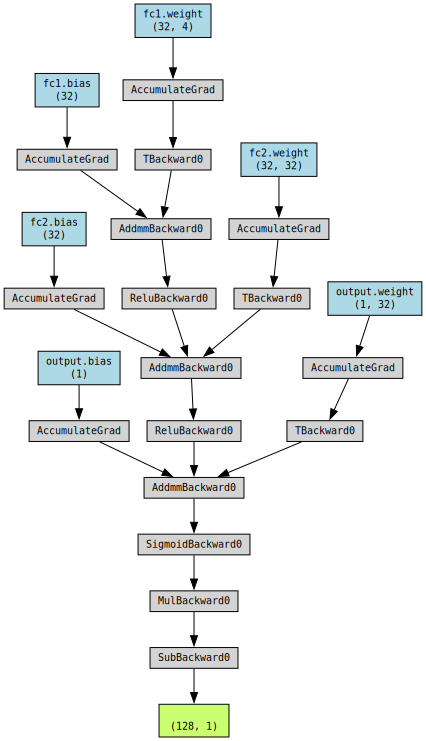

In [49]:
import torchviz 
import torch.nn.functional as F 

sample_input = torch.randn(128, 4)
model = NeuralNetwork(4, 32).to(device)
recon_batch = model(sample_input)
torchviz.make_dot(recon_batch, params=dict(model.named_parameters()))

### Optimizing the Model Parameters

In [50]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        outputs = model(X)
        # Apply LogSoftmax to the outputs
        # log_outputs = torch.log_softmax(outputs, dim=1)
        # Calculate loss
        # outputs = torch.log_softmax(outputs, dim=1)
        # y = torch.softmax(y, dim=1)
        loss = loss_fn(outputs, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 10 == 0:
            loss, current = loss.item(), batch * size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [51]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            
            # pred = torch.log_softmax(pred, dim=1)
            # y = torch.softmax(y, dim=1)

            test_loss += loss_fn(pred, y).item()

            if batch % 10 == 0:
                # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
                print(f'Predicted: "{pred}", Actual: "{y}", loss: "{test_loss}"')
    # test_loss /= num_batches
    # # correct /= size
    # print(f"Avg loss: {test_loss:>8f} \n")


In [52]:

def eval(dataloader, model):
    model.eval()
    with torch.no_grad():
        for batch, (batch_features, batch_targets) in enumerate(dataloader):
            pred = model(batch_features)

            if batch % 10 == 1:
                pred.view(-1)
                # pred = torch.log(torch.abs(pred))
                # pred = torch.log(pred)
                # predicted, actual = classes[pred[0].argmax(0)], classes[y]
                print(f'Predicted: "{pred}", Actual: "{batch_targets}"')

In [53]:
epochs = 10
kl_loss = nn.KLDivLoss(reduction='batchmean')
mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, mse_loss, optimizer)
    test(test_dataloader, model, mse_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 0.206915  [    1/    8]
Predicted: "tensor([[0.5096]])", Actual: "tensor([0.])", loss: "0.2597423791885376"
Epoch 2
-------------------------------
loss: 0.249363  [    1/    8]
Predicted: "tensor([[0.4834]])", Actual: "tensor([0.])", loss: "0.2337227463722229"
Epoch 3
-------------------------------
loss: 0.240392  [    1/    8]
Predicted: "tensor([[0.4450]])", Actual: "tensor([0.])", loss: "0.19802440702915192"
Epoch 4
-------------------------------
loss: 0.221160  [    1/    8]
Predicted: "tensor([[0.3942]])", Actual: "tensor([0.])", loss: "0.15541918575763702"
Epoch 5
-------------------------------
loss: 0.197836  [    1/    8]
Predicted: "tensor([[0.3207]])", Actual: "tensor([0.])", loss: "0.10283058881759644"
Epoch 6
-------------------------------
loss: 0.156979  [    1/    8]
Predicted: "tensor([[0.2322]])", Actual: "tensor([0.])", loss: "0.05391289293766022"
Epoch 7
-------------------------------
loss: 0.108396  [    1/    8]
Pr

/opt/homebrew/anaconda3/envs/python-notebook/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [54]:
eval(test_dataloader, model)

Predicted: "tensor([[0.9736]])", Actual: "tensor([1.])"


### Model Save & Load

In [55]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [56]:
model = NeuralNetwork(4, 32).to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [57]:
model.eval()
with torch.no_grad():
    for batch, (batch_features, batch_targets) in enumerate(test_dataloader):
        pred, actual = model(batch_features), batch_targets
        print(f'pred: "{pred}"')
        # predicted, actual = classes[pred[0].argmax(0)], classes[y]
        print(f'Predicted: "{pred}", Actual: "{actual}"')

pred: "tensor([[-0.0160]])"
Predicted: "tensor([[-0.0160]])", Actual: "tensor([0.])"
pred: "tensor([[0.9736]])"
Predicted: "tensor([[0.9736]])", Actual: "tensor([1.])"
pred: "tensor([[-0.0160]])"
Predicted: "tensor([[-0.0160]])", Actual: "tensor([0.])"
pred: "tensor([[0.9736]])"
Predicted: "tensor([[0.9736]])", Actual: "tensor([1.])"
pred: "tensor([[-0.0160]])"
Predicted: "tensor([[-0.0160]])", Actual: "tensor([0.])"
pred: "tensor([[0.9736]])"
Predicted: "tensor([[0.9736]])", Actual: "tensor([1.])"
pred: "tensor([[-0.0160]])"
Predicted: "tensor([[-0.0160]])", Actual: "tensor([0.])"
pred: "tensor([[0.9736]])"
Predicted: "tensor([[0.9736]])", Actual: "tensor([1.])"


In [58]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print(data.feature_names)

X, y = data.data, data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [59]:
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [60]:
import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [61]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split


# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 0.49
RMSE: 0.70


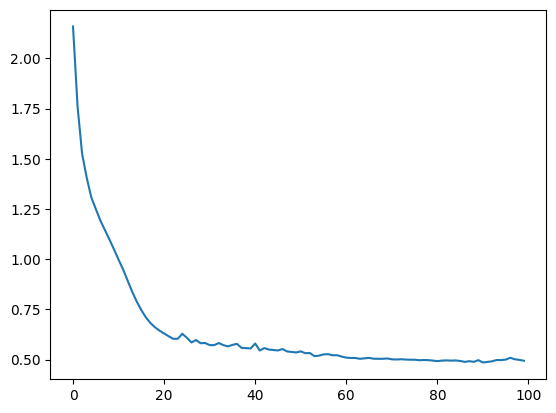

In [62]:
import matplotlib.pyplot as plt

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

MSE: 0.49
RMSE: 0.70


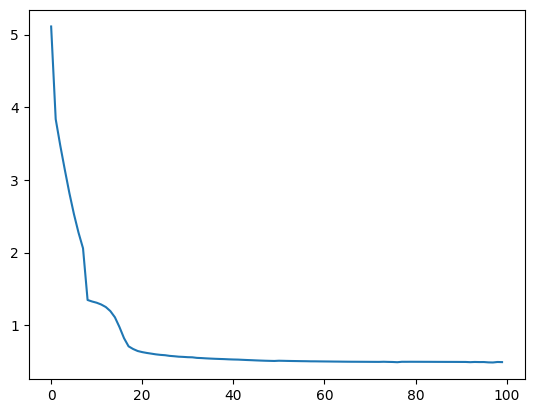

In [63]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Read data
data = fetch_california_housing()
X, y = data.data, data.target

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

#

## Strategy optimizer

### Optimization Optimizer

In [ ]:
# input -> strategy(input, hyper) -> output
# input hyper -> result by input in loss function -> output
# eg. reward = a * 2 + b * 5 + c * 3 and a + b + c = 10. ideal result is [2, 5, 3] 
# output = [theta1, theta2, theta3]
# loss = output1...3 -> loss

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.a = nn.Parameter(torch.tensor(1.0))
        self.b = nn.Parameter(torch.tensor(1.0))
        self.c = nn.Parameter(torch.tensor(1.0))
    
    def forward(self):
        # Apply the constraint a + b + c = 10
        total = self.a + self.b + self.c
        scale = 10.0 / total
        a_scaled = self.a * scale
        b_scaled = self.b * scale
        c_scaled = self.c * scale
        return a_scaled, b_scaled, c_scaled

# Objective function
def loss1(a, b, c):
    return -(a * 2 + b * 5 + c * 3)

def loss2(a, b, c):
    return 100 * (a + b + c - 10) * (a + b + c - 10)

def loss3(a, b, c):
    return a ** 2 + b ** 2 + c ** 2

# Initialize the model
model = SimpleNet()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    a, b, c = model()
    loss = loss1(a, b, c) + loss2(a, b, c) + loss3(a, b, c)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, a: {a.item():.4f}, b: {b.item():.4f}, c: {c.item():.4f}')

# Final optimized values
a_opt, b_opt, c_opt = model()
print(f'Optimized values - a: {a_opt.item():.4f}, b: {b_opt.item():.4f}, c: {c_opt.item():.4f}')


Epoch [100/1000], Loss: -1.1666, a: 2.6622, b: 4.1711, c: 3.1667
Epoch [200/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [300/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [400/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [500/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [600/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [700/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [800/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [900/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Epoch [1000/1000], Loss: -1.1667, a: 2.6667, b: 4.1667, c: 3.1667
Optimized values - a: 2.6667, b: 4.1667, c: 3.1667


### Regression Optimization

Epoch [100/1000], Loss: 0.1263
Epoch [200/1000], Loss: 0.0249
Epoch [300/1000], Loss: 0.0082
Epoch [400/1000], Loss: 0.0032
Epoch [500/1000], Loss: 0.0049
Epoch [600/1000], Loss: 0.0018
Epoch [700/1000], Loss: 0.0046
Epoch [800/1000], Loss: 0.0015
Epoch [900/1000], Loss: 0.0015
Epoch [1000/1000], Loss: 0.0019


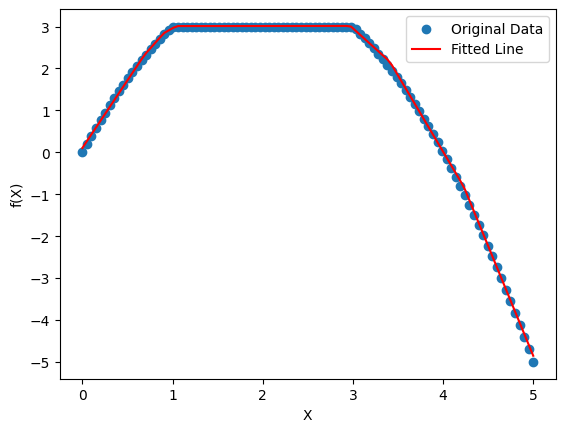

Optimal value: 3.0144801139831543 at X: 2.929292917251587


In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate data for the optimization problem
X = np.linspace(0, 5, 100).reshape(-1, 1)  # Features
y = -X**2 + 4*X  # Labels (objective function values)
y = np.where(y > 3, 3, y)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define a simple neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = 1
hidden_size = 10
model = NeuralNetwork(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(X_tensor).numpy()

# Plot the results
plt.scatter(X, y, label='Original Data')
plt.plot(X, predicted, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

# Find the optimal solution
X_new = torch.tensor(np.linspace(0, 5, 100).reshape(-1, 1), dtype=torch.float32)
with torch.no_grad():
    predictions = model(X_new)
optimal_value, optimal_index = torch.max(predictions, 0)
optimal_x = X_new[optimal_index]

print(f'Optimal value: {optimal_value.item()} at X: {optimal_x.item()}')


In [65]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd


class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)
        self.targets = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)  # No sigmoid here
        return x


data = {
    'feature1': [1.0, 2.0, 3.0, 4.0],
    'feature2': [5.0, 6.0, 7.0, 8.0],
    'feature3': [9.0, 10.0, 11.0, 12.0],
    'target': [0.0, 0.2, 0.4, 0.6]
}

df = pd.DataFrame(data)

# Split into features and targets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Create dataset and dataloader
batch_size = 2
dataset = CustomDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

import torch.optim as optim
from sklearn.metrics import mean_squared_error

# Instantiate the model, define the loss function and the optimizer
input_size = X.shape[1]
hidden_size = 5
model = NeuralNetwork(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_features, batch_targets in dataloader:
        model.train()
        optimizer.zero_grad()
        outputs = model(batch_features)
        scaled_outputs = torch.sigmoid(outputs)  # Scale the output to [0, 1] here
        loss = criterion(scaled_outputs, batch_targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_epoch_loss = epoch_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Evaluation
model.eval()
val_dataset = CustomDataset(X, y)
val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

predicted_values = []
target_values = []

with torch.no_grad():
    for batch_features, batch_targets in val_dataloader:
        outputs = model(batch_features)
        scaled_outputs = torch.sigmoid(outputs)  # Scale the output to [0, 1] here
        predicted_values.extend(scaled_outputs.numpy())
        target_values.extend(batch_targets.numpy())

# Compute MSE
predicted_values = torch.tensor(predicted_values).view(-1)
target_values = torch.tensor(target_values).view(-1)

mse = mean_squared_error(target_values, predicted_values)
print(f'Mean Squared Error (MSE): {mse:.4f}')


Epoch [1/10], Loss: 0.0720
Epoch [2/10], Loss: 0.0643
Epoch [3/10], Loss: 0.0620
Epoch [4/10], Loss: 0.0593
Epoch [5/10], Loss: 0.0604
Epoch [6/10], Loss: 0.0588
Epoch [7/10], Loss: 0.0586
Epoch [8/10], Loss: 0.0592
Epoch [9/10], Loss: 0.0587
Epoch [10/10], Loss: 0.0577
Mean Squared Error (MSE): 0.0571
